In [324]:
import json
import pandas as pd
import nltk
import string
import re
import csv
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer, LancasterStemmer
%matplotlib inline

In [2]:
questions = pd.read_csv('Questions.csv',encoding='latin1')

    Id  OwnerUserId          CreationDate  Score  \
0  469        147.0  2008-08-02T15:11:16Z     21   
1  502        147.0  2008-08-02T17:01:58Z     27   
2  535        154.0  2008-08-02T18:43:54Z     40   
3  594        116.0  2008-08-03T01:15:08Z     25   
4  683        199.0  2008-08-03T13:19:16Z     28   

                                               Title  \
0  How can I find the full path to a font from it...   
1            Get a preview JPEG of a PDF on Windows?   
2  Continuous Integration System for a Python Cod...   
3     cx_Oracle: How do I iterate over a result set?   
4  Using 'in' to match an attribute of Python obj...   

                                                Body  
0  <p>I am using the Photoshop's javascript API t...  
1  <p>I have a cross-platform (Python) applicatio...  
2  <p>I'm starting work on a hobby project with a...  
3  <p>There are several ways to iterate over a re...  
4  <p>I don't remember whether I was dreaming or ...  


In [208]:
questions.shape

(607282, 7)

In [93]:
questions.loc[1]

Id                                                            502
OwnerUserId                                                   147
CreationDate                                 2008-08-02T17:01:58Z
Score                                                          27
Title                     Get a preview JPEG of a PDF on Windows?
Body            <p>I have a cross-platform (Python) applicatio...
Name: 1, dtype: object

In [17]:
questions["Body"].apply(lambda x: len(x.split(" "))).mean()

222.54704733550474

In [209]:
questions["Body"].apply(lambda x: len(x.split(" "))).min()

1

In [210]:
questions["Body"].apply(lambda x: len(x.split(" "))).max()

31300

In [385]:
nltk.data.path.append("/Users/youqiao/workspace/env/nltk_data")
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def cleantags(text):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    return cleantext

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def lemmatize_tokens(tokens, lemmatizer):
    lemmatized = []
    for item in tokens:
        lemmatized.append(lemmatizer.lemmatize(item, pos='v'))
    return lemmatized

def extractwords(tokens):
    new_tokens = []
    for word, pos in nltk.pos_tag(tokens):
        if pos[:2] == 'NN' or pos[:2] == "JJ":
            new_tokens.append(word)
    return new_tokens

def excludestopwords(tokens):
    new_tokens = []
    for word in tokens:
        if word not in stopwords:
            new_tokens.append(word)
    return new_tokens

def tokenize_language(text):
    text = cleantags(text)
    translator = str.maketrans('', '', string.punctuation)
    no_punctuation = text.translate(translator)
    tokens = nltk.word_tokenize(no_punctuation)
    return tokens

def tokenize(text):
    text = cleantags(text)
    translator = str.maketrans('', '', string.punctuation)
    no_punctuation = text.translate(translator)
    #no_punctuation = excludestopwords(no_punctuation)
    tokens = nltk.word_tokenize(no_punctuation)
    
#     stems = stem_tokens(tokens, stemmer)
#     return stems
    lemmatizes = lemmatize_tokens(tokens, lemmatizer)
    
    # return extractwords(lemmatizes)
    return lemmatizes

def tokenizewithnostem(text):
    text = cleantags(text)
    translator = str.maketrans('', '', string.punctuation)
    no_punctuation = text.translate(translator)
    tokens = nltk.word_tokenize(no_punctuation)
    lemmatizes = lemmatize_tokens(tokens, lemmatizer)
    return lemmatizes

In [110]:
questions["content"] = questions["Title"] + " " + questions["Body"]

In [132]:
questions.loc[0,"content"]

"How can I find the full path to a font from its display name on a Mac? <p>I am using the Photoshop's javascript API to find the fonts in a given PSD.</p>\n\n<p>Given a font name returned by the API, I want to find the actual physical font file that that font name corresponds to on the disc.</p>\n\n<p>This is all happening in a python program running on OSX so I guess I'm looking for one of:</p>\n\n<ul>\n<li>Some Photoshop javascript</li>\n<li>A Python function</li>\n<li>An OSX API that I can call from python</li>\n</ul>\n"

In [115]:
stop = stopwords.words('english')

In [117]:
questions.shape

(607282, 7)

In [118]:
sampled_data = questions.sample(n=50000, random_state=36)

In [119]:
sampled_data.shape

(50000, 7)

In [162]:
tfidfvector = TfidfVectorizer(tokenizer=tokenize, ngram_range = (1,1), min_df = 0.05, max_df = 0.9, stop_words=stop)
# tfidfvector = TfidfVectorizer(tokenizer=tokenize, ngram_range = (1,1), stop_words=stop)
text_tfidf = tfidfvector.fit_transform(sampled_data["content"])
text_tfidf.shape

(50000, 106)

In [163]:
wordbag = tfidfvector.get_feature_names()

In [164]:
wordbag

['able',
 'anyone',
 'app',
 'application',
 'array',
 'b',
 'base',
 'c',
 'call',
 'cant',
 'case',
 'change',
 'class',
 'code',
 'command',
 'create',
 'data',
 'def',
 'different',
 'django',
 'doesnt',
 'dont',
 'edit',
 'end',
 'error',
 'example',
 'field',
 'file',
 'fine',
 'first',
 'follow',
 'function',
 'gt',
 'help',
 'id',
 'im',
 'import',
 'input',
 'issue',
 'ive',
 'key',
 'last',
 'line',
 'list',
 'look',
 'loop',
 'ltmodulegt',
 'main',
 'many',
 'message',
 'method',
 'model',
 'module',
 'name',
 'new',
 'none',
 'number',
 'numpy',
 'object',
 'order',
 'output',
 'page',
 'part',
 'pass',
 'point',
 'possible',
 'print',
 'problem',
 'process',
 'program',
 'python',
 'question',
 'r',
 'recent',
 'request',
 'result',
 'return',
 'row',
 'run',
 'script',
 'second',
 'server',
 'simple',
 'solution',
 'something',
 'start',
 'string',
 'sure',
 'test',
 'text',
 'thank',
 'time',
 'traceback',
 'true',
 'try',
 'type',
 'url',
 'use',
 'user',
 'value',
 'va

In [157]:
text_df = text_tfidf.toarray()
vectorizedtext = pd.DataFrame(text_df, columns=wordbag)

In [158]:
for word in wordbag:
    vectorizedtext.ix[vectorizedtext[word] == 0, word] = 0
    vectorizedtext.ix[vectorizedtext[word] != 0, word] = 1
    vectorizedtext[word] = vectorizedtext[word].astype(int)

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [159]:
vectorizedtext.to_csv("stackoverflow_default_f_nn.csv", header=False, index=False)

In [160]:
arfffile = open("stackoverflow_default_f_nn.arff", "w")
arfffile.write("@relation stackoverflow_default_f_nn.data\n")
for s in wordbag:
    arfffile.write("@attribute " + s + " {0, 1}\n")
arfffile.close()

# Processing tags.csv

In [257]:
tags = pd.read_csv('Tags.csv', encoding='latin1')

In [264]:
tagsfrequency = tags["Tag"].value_counts()

In [265]:
tagsfrequency = pd.DataFrame(tagsfrequency)

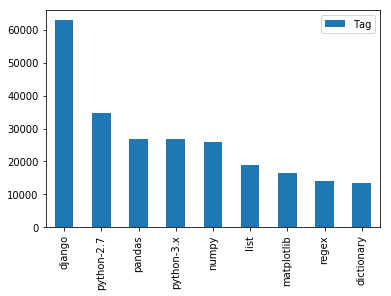

In [273]:
tagsfrequency.ix[1:10, ].plot.bar()

In [185]:
ids_django = tags[tags["Tag"] == "django"]["Id"]

In [187]:
ids_django = pd.DataFrame(ids_django)

In [191]:
django_questions = ids_django.set_index('Id').join(questions.set_index('Id'))

In [277]:
django_questions['CreationDate'] = django_questions['CreationDate'].astype(str)

In [284]:
sampled_django_questions = django_questions[django_questions["CreationDate"] > "2016" ]

In [286]:
# sampled_django_questions = sampled_django_questions.sample(n=5000, random_state=36)
sampled_django_questions.shape

(11903, 6)

In [289]:
d_tfidfvector = TfidfVectorizer(tokenizer=tokenize, ngram_range = (1,3), min_df = 0.1, max_df = 0.9, stop_words=stop)
d_text_tfidf = d_tfidfvector.fit_transform(sampled_django_questions["content"])
d_text_tfidf.shape

(11903, 97)

In [290]:
d_wordbag = d_tfidfvector.get_feature_names()

In [291]:
d_wordbag

['1',
 '2',
 'add',
 'admin',
 'also',
 'app',
 'call',
 'cant',
 'change',
 'class',
 'class meta',
 'code',
 'could',
 'create',
 'data',
 'database',
 'def',
 'default',
 'django',
 'doesnt',
 'dont',
 'else',
 'error',
 'example',
 'field',
 'file',
 'find',
 'first',
 'follow',
 'form',
 'function',
 'get',
 'give',
 'go',
 'gt',
 'help',
 'however',
 'id',
 'im',
 'import',
 'ive',
 'know',
 'kwargs',
 'last',
 'like',
 'line',
 'list',
 'look',
 'make',
 'meta',
 'method',
 'model',
 'model class',
 'modelspy',
 'name',
 'need',
 'new',
 'none',
 'object',
 'one',
 'page',
 'post',
 'problem',
 'project',
 'python',
 'question',
 'renderrequest',
 'request',
 'result',
 'return',
 'return renderrequest',
 'run',
 'save',
 'see',
 'seem',
 'server',
 'set',
 'show',
 'something',
 'template',
 'thank',
 'time',
 'true',
 'try',
 'type',
 'update',
 'url',
 'use',
 'use django',
 'user',
 'value',
 'view',
 'viewspy',
 'want',
 'way',
 'work',
 'would']

In [292]:
d_text_df = d_text_tfidf.toarray()
d_vectorizedtext = pd.DataFrame(d_text_df, columns=d_wordbag)

In [293]:
for word in d_wordbag:
    d_vectorizedtext.ix[d_vectorizedtext[word] == 0, word] = 0
    d_vectorizedtext.ix[d_vectorizedtext[word] != 0, word] = 1
    d_vectorizedtext[word] = d_vectorizedtext[word].astype(int)

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [294]:
d_vectorizedtext.to_csv("stackoverflow_default_django.csv", header=False, index=False)
d_arfffile = open("stackoverflow_default_django.arff", "w")
d_arfffile.write("@relation stackoverflow_default_django.data\n")
for s in d_wordbag:
    d_arfffile.write("@attribute " + s + " {0, 1}\n")
d_arfffile.close()

import collections
class defaultkeydict(collections.defaultdict):
    """Like defaultdict, but the default_factory is a function of the key.
    >>> d = defaultkeydict(len); d['four']
    4
    """
    def __missing__(self, key):
        self[key] = result = self.default_factory(key)
#         print(self)
        return result

class obj():
    def __init__(self, s):
        self.a = s
    
    def __add__(self, rhs):
        return self.a + rhs.a
def obje(name):
    return obj("456")
M = 123
eval("M", defaultkeydict(obje))
print(eval("M", defaultkeydict(obje)).a)

In [339]:
itemset = django_questions["content"]

In [340]:
itemset = pd.DataFrame(itemset)

In [341]:
itemset["content"] = itemset["content"].apply(lambda x: ",".join(tokenize(x)))

In [317]:
itemset.to_csv("stackoverflow_default_django_text.csv", header=False, index=False)

# Other programming language

In [354]:
languages = {"javascript": 0,"java": 1,
             "php": 2,"css": 3,"ruby": 4,
             "c": 5,"swift": 6,"scala": 7,
             "r": 8,"matlab": 9,"python": 10}

In [355]:
ex_tv = TfidfVectorizer(tokenizer=tokenize_language, vocabulary=languages)
ex_text = ex_tv.fit_transform(questions["content"])
ex_text.shape

(607282, 11)

In [356]:
ex_wordbag = ex_tv.get_feature_names()
ex_wordbag

['javascript',
 'java',
 'php',
 'css',
 'ruby',
 'c',
 'swift',
 'scala',
 'r',
 'matlab',
 'python']

In [357]:
ex_text_df = ex_text.toarray()
ex_text_df = pd.DataFrame(ex_text_df, columns=ex_wordbag)

In [359]:
for word in ex_wordbag:
    ex_text_df.ix[ex_text_df[word] == 0, word] = 0
    ex_text_df.ix[ex_text_df[word] != 0, word] = 1
    ex_text_df[word] = ex_text_df[word].astype(int)

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [374]:
ex_text_df["itemset"] = ex_text_df.apply(lambda row: genitemset(row, ex_wordbag), axis=1)

In [372]:
def genitemset(row, wordbags):
    itemsets = []
    for word in wordbags:
        if row[word] == 1:
            itemsets.append(word)
    return ",".join(itemsets)

In [376]:
ex_text_df["itemset"].to_csv("stackoverflow_language.basket", header=False, index=False)

In [360]:
ex_text_df.to_csv("stackoverflow_language.csv", header=False, index=False)
ex_arfffile = open("stackoverflow_language.arff", "w")
ex_arfffile.write("@relation stackoverflow_language.data\n")
for s in ex_wordbag:
    ex_arfffile.write("@attribute " + s + " {0, 1}\n")
ex_arfffile.close()

# Extracting pandas topic

In [377]:
ids_pandas = tags[tags["Tag"] == "pandas"]["Id"]
ids_pandas = pd.DataFrame(ids_pandas)
pandas_questions = ids_pandas.set_index('Id').join(questions.set_index('Id'))

In [378]:
pandas_questions

,OwnerUserId,CreationDate,Score,Title,Body,content
Id,,,,,,
5486226,683866.0,2011-03-30T12:26:50Z,4,Rolling median in python,<p>I have some stock data based on daily close...,Rolling median in python <p>I have some stock ...
5515021,687739.0,2011-04-01T14:50:44Z,8,Compute a compounded return series in Python,"<p>Greetings all, I have two series of data: d...",Compute a compounded return series in Python <...
5558607,687739.0,2011-04-05T21:13:50Z,2,Sort a pandas DataMatrix in ascending order,"<p>The pandas DataFrame object has a <a href=""...",Sort a pandas DataMatrix in ascending order <p...
6467832,814005.0,2011-06-24T12:31:45Z,8,How to get the correlation between two timeser...,"<p>I have two sets of temperature date, which ...",How to get the correlation between two timeser...
7577546,510187.0,2011-09-28T01:58:38Z,9,"Using pandas, how do I subsample a large DataF...",<p>I am trying to subsample rows of a DataFram...,"Using pandas, how do I subsample a large DataF..."
7776679,601314.0,2011-10-15T08:21:17Z,22,append two data frame with pandas,<p>I try to merge dataframes by rows doing:</p...,append two data frame with pandas <p>I try to ...
7813132,601314.0,2011-10-18T20:16:12Z,9,Convert array of string (category) to array of...,<p>I am trying to do something very similar to...,Convert array of string (category) to array of...
7837722,1005409.0,2011-10-20T14:46:14Z,121,What is the most efficient way to loop through...,<p>I want to perform my own complex operations...,What is the most efficient way to loop through...
8273092,668624.0,2011-11-25T18:39:02Z,1,python: pandas install errors,<p>I have the academic distribution of EPD 7.1...,python: pandas install errors <p>I have the ac...


In [382]:
pd_tfidfvector = TfidfVectorizer(tokenizer=tokenizewithnostem, ngram_range = (1,3), min_df = 0.1, max_df = 0.9, stop_words=stop)
pd_text_tfidf = pd_tfidfvector.fit_transform(pandas_questions["content"])
pd_text_tfidf.shape

(26854, 103)

In [383]:
pd_wordbag = pd_tfidfvector.get_feature_names()
pd_wordbag

['0',
 '0 1',
 '1',
 '1 1',
 '1 2',
 '10',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'add',
 'also',
 'b',
 'base',
 'c',
 'call',
 'code',
 'column',
 'columns',
 'contain',
 'convert',
 'could',
 'create',
 'csv',
 'data',
 'data frame',
 'dataframe',
 'date',
 'def',
 'df',
 'different',
 'error',
 'example',
 'file',
 'find',
 'first',
 'follow',
 'frame',
 'function',
 'get',
 'give',
 'group',
 'help',
 'however',
 'id',
 'im',
 'import',
 'import pandas',
 'import pandas pd',
 'index',
 'ive',
 'know',
 'last',
 'like',
 'line',
 'list',
 'look',
 'look like',
 'make',
 'name',
 'nan',
 'need',
 'new',
 'number',
 'numpy',
 'object',
 'one',
 'output',
 'pandas',
 'pandas dataframe',
 'pandas pd',
 'pd',
 'print',
 'problem',
 'python',
 'question',
 'read',
 'result',
 'return',
 'row',
 'see',
 'seem',
 'series',
 'set',
 'something',
 'string',
 'thank',
 'time',
 'try',
 'two',
 'use',
 'use pandas',
 'value',
 'want',
 'way',
 'work',
 'would',
 'would like',
 'x']

In [ ]:
def makearff(tag, filename):
    

In [384]:
pd_text_df = pd_text_tfidf.toarray()
pd_text_df = pd.DataFrame(pd_text_df, columns=pd_wordbag)
for word in pd_wordbag:
    pd_text_df.ix[pd_text_df[word] == 0, word] = 0
    pd_text_df.ix[pd_text_df[word] != 0, word] = 1
    pd_text_df[word] = pd_text_df[word].astype(int)

pd_text_df.to_csv("stackoverflow_pandas.csv", header=False, index=False)
pd_arfffile = open("stackoverflow_pandas.arff", "w")
pd_arfffile.write("@relation stackoverflow_pandas.data\n")
for s in pd_wordbag:
    pd_arfffile.write("@attribute " + s + " {0, 1}\n")
pd_arfffile.close()

/Users/youqiao/env/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [386]:
file1 = open("123.txt", "w")
file1.write("123\n")
file1.write("456\n")
file1.write("789\n")

'ash_jsd'